# Data Recovery and Exploration

This first part will help you to import the data set in order to use the rest of the algorithm.

## I) Download the full data set

Go to this page : https://www.oqali.fr/donnees-publiques/base-de-donnees-oqali/ 
And take the datasets called : "ingredients" and "produits". The are missing values with the real file I had access to, but this is already enough to have good results.
And put them in the file : "..\food-classification\data_preparation\data_oqali\"

## II) Create the full data set

The with the different files, you will create the full data set, which will be used in the second part with the NLP

In [45]:
import pandas as pd

ingredients = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_oqali\ingredients.csv', low_memory=False, sep=';')
ingredients = ingredients.rename(columns={ 'Code produit': 'Code_produit' })
ingredients = ingredients[~ingredients['Secteur'].isin(['Sauces condimentaires_RHF', 'Bouillons et potages_RHF'])]
ingredients

Code_produit                                  Secteur  \
0                 450      Produits laitiers et desserts frais   
1                 450      Produits laitiers et desserts frais   
2                 450      Produits laitiers et desserts frais   
3                 450      Produits laitiers et desserts frais   
4                 450      Produits laitiers et desserts frais   
...               ...                                      ...   
1451210        101542  Sirops et boissons concentrees a diluer   
1451211        101543  Sirops et boissons concentrees a diluer   
1451212        101543  Sirops et boissons concentrees a diluer   
1451213        101543  Sirops et boissons concentrees a diluer   
1451214        101543  Sirops et boissons concentrees a diluer   

                                              Famille    Code barre  \
0        Yaourts et laits fermentes sucres classiques           NaN   
1        Yaourts et laits fermentes sucres classiques           NaN   
2        Yaourts et laits fermentes sucres classiques           NaN   
3        Yaourts et laits fermentes sucres classiques           NaN   
4        Yaourts et laits fermentes sucres classiques           NaN   
...                                               ...           ...   
1451210                                        Sirops  3.257980e+12   
1451211                                        Sirops  3.257982e+12   
1451212                                        Sirops  3.257982e+12   
1451213                                        Sirops  3.257982e+12   
1451214                                        Sirops  3.257982e+12   

                  Marque      Nom du produit  \
0                    NaN                 NaN   
1                    NaN                 NaN   
2                    NaN                 NaN   
3                    NaN                 NaN   
4                    NaN                 NaN   
...                  ...                 ...   
1451210             CORA  SIROP DE GRENADINE   
1451211  CORA.NATURE BIO    SIROP MENTHE BIO   
1451212  CORA.NATURE BIO    SIROP MENTHE BIO   
1451213  CORA.NATURE BIO    SIROP MENTHE BIO   
1451214  CORA.NATURE BIO    SIROP MENTHE BIO   

                                     Dénomination de vente  \
0                                                      NaN   
1                                                      NaN   
2                                                      NaN   
3                                                      NaN   
4                                                      NaN   
...                                                    ...   
1451210                                 Sirop de grenadine   
1451211  Sirop de menthe. issu de l_agriculture biologique   
1451212  Sirop de menthe. issu de l_agriculture biologique   
1451213  Sirop de menthe. issu de l_agriculture biologique   
1451214  Sirop de menthe. issu de l_agriculture biologique   

         Année de collecte la plus récente  \
0                                     2007   
1                                     2007   
2                                     2007   
3                                     2007   
4                                     2007   
...                                    ...   
1451210                               2019   
1451211                               2019   
1451212                               2019   
1451213                               2019   
1451214                               2019   

                                                Ingrédient Type d'ingrédient  \
0                                  lait ecreme reconstitue                 _   
1                                                    sucre                 _   
2                                        fruit : framboise                 _   
3                                                    creme                 _   
4        epaississants : amidon transforme de mais, gom...                 _   
...     

We can see some features that are interesting like : "Code produit", "Secteur", "Famille", "Nom du produit", "Dénomination de vente", "Ingrédient"

## III) The features

- The data from the Web-Scraping

**Nom**: The name of the article, examples : "VITTEL Eau minérale naturelle plate 50cl", "SENSEO Dosettes de café classique 54 dosettes 375g"

**Ingrédients** : The composition of the article

**Dénomination légale de vente**: 

- The data from Oqali :

**Nom du produit**:

**Dénomination de vente**:


**Ingrédients**: 


## IV) Descriptive statistique about variables of interest : "Secteur" and "Famille"

In [46]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

ingredients_code = ingredients.drop_duplicates(subset=['Code_produit'])
ingredients_code["Secteur"].iplot(kind='hist',
    xTitle='Secteur',
    linecolor='black',
    yTitle='Quantité',
    title="Distribution de l'offre alimentaire par secteur")

In [47]:
ingredients_code["Famille"].iplot(kind='hist',
    xTitle='Famille',
    linecolor='black',
    yTitle='Quantité',
    title="Distribution de l'offre alimentaire par famille")

In [48]:
ingredients_code.groupby('Secteur').count()['Famille'].sort_values(ascending=False).iplot(kind='bar', yTitle='Quantité', linecolor='black', opacity=0.8, title='Diagramme à barres des secteurs', xTitle='Secteur')

Nombre de secteurs : 31


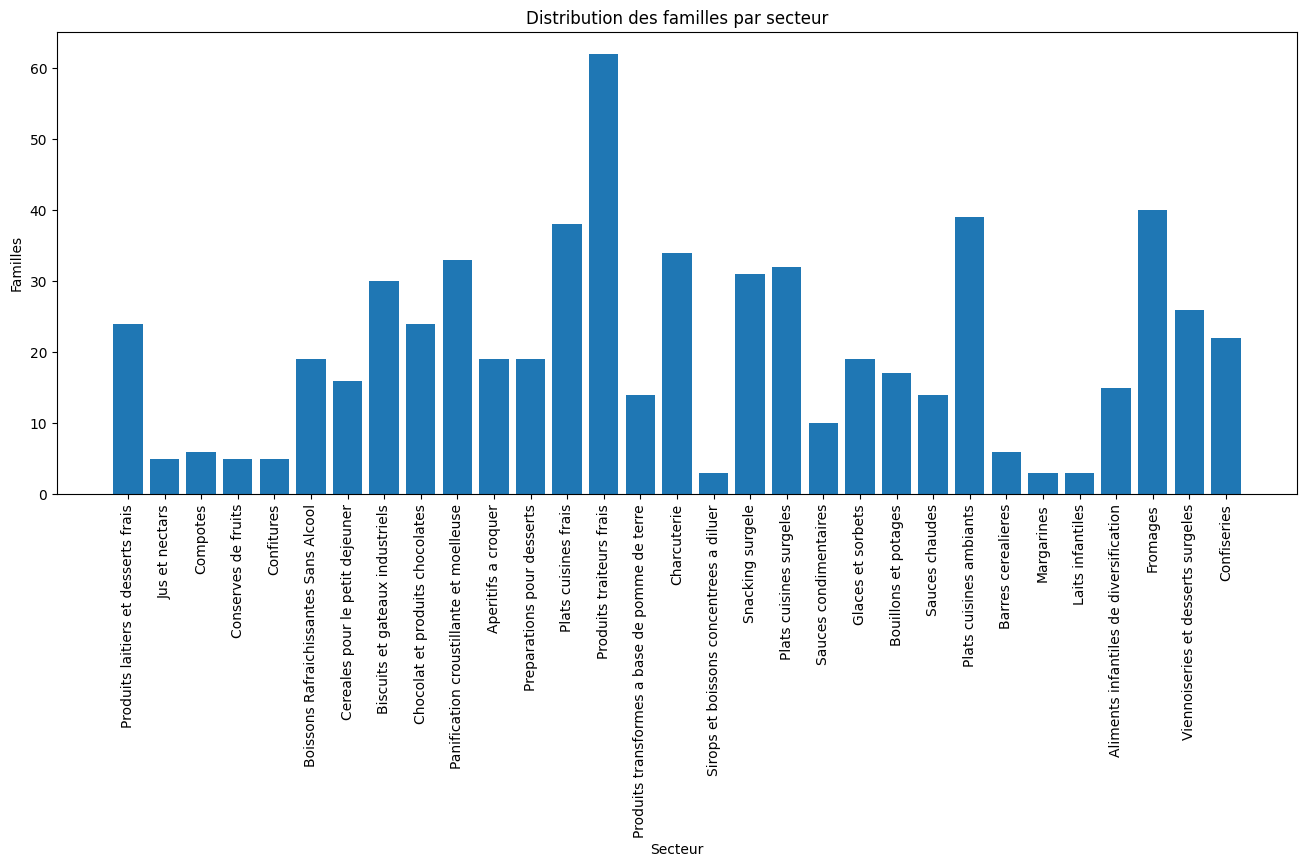

In [49]:
import matplotlib.pyplot as plt

secteurs = ingredients_code["Secteur"].unique()
print("Nombre de secteurs :", len(secteurs))

secteurs_familles = [[secteur, 0, []] for secteur in secteurs]
for df_index in ingredients_code.index: 
    for index in range(len(secteurs_familles)):
        if ingredients_code['Secteur'][df_index] == secteurs_familles[index][0]:
            if not ingredients_code['Famille'][df_index] in secteurs_familles[index][2]:
                secteurs_familles[index][1] += 1
                secteurs_familles[index][2].append(ingredients_code['Famille'][df_index])
            break

plt.figure(figsize=(16,6))
plt.bar(secteurs, [secteur[1] for secteur in secteurs_familles])
plt.xticks(rotation=90)
plt.xlabel("Secteur")
plt.ylabel("Familles")
plt.title("Distribution des familles par secteur")
plt.show()

In [51]:
familles = ingredients_code["Famille"].unique()
len(familles)

633

Some sectors are more presents than others, we must take it into account.

They are many families, so we must execute the algorithm in two part, the first find the Secteur and then the Family.